In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as subplots
import plotly.express as px

import geonamescache 
import country_converter as coco # для приведения всех названий стран к единому формату
from geopy.geocoders import Nominatim # для нахождения lat и lon городов
from tqdm.auto import tqdm
import plotly.io as pio
pio.renderers.default = "svg"

In [3]:
#загрузим все таблицы
democracy_rating = pd.read_csv('tables/democracy_rating.csv')
human_dev_rating = pd.read_csv('tables/human_dev_rating.csv')
quality_of_life_rating = pd.read_csv('tables/quality_of_life_rating.csv')
security_cities_rating = pd.read_csv('tables/security_cities_rating.csv')
colors_democracy_rating = ['#660018', '#a8261f', '#f46d43', '#fdae61', '#fee08b', '#a6d96a', '#66bd63', '#1a9850', '#006800']

#### Главный файл с анализом и визуализацией:
1. Загрузка таблиц, описание
2. Визуализация каждой таблицы
3. Корреляции и Т-тест

#### Этапы работы над проектом:
1. Собрать все данные
2. Сделать визуализацию/анализ данных
3. Привести все файлы к нормальному виду

## Таблицы
#### Индекс демократии
regime_type - тип политического режима \
overall_score - общая оценка \
electorat_and_pluralism - избирательный процесс и плюрализм \
government - функционирование правительства \
political participation - участие в политической жизни \
political_culture - политическая культура \
civil_liberties - гражданские свободы

In [139]:
democracy_rating.head(3)

rank      country     regime_type  overall_score  electorat_and_pluralism  \
0     1       Norway  Full democracy           9.75                     10.0   
1     2  New Zealand  Full democracy           9.37                     10.0   
2     3      Finland  Full democracy           9.27                     10.0   

   government  poli­tical_partici­pation  poli­tical_cul­ture  \
0        9.64                      10.00                10.00   
1        8.93                       9.44                 8.75   
2        9.29                       8.89                 8.75   

   civil_liber­ties  
0              9.12  
1              9.71  
2              9.41

#### Индекс человеческого развития

hdi - индекс человеческого развития \
average annual growth - рост в среднем по годам



In [140]:
human_dev_rating.head(3)

rank      country    hdi average_annual_growth
0     1  Switzerland  0.962                 0.19%
1     2       Norway  0.961                 0.19%
2     3      Iceland  0.959                 0.56%

#### Рейтинг городов мира по уровню качества жизни

In [141]:
quality_of_life_rating = quality_of_life_rating.drop('Unnamed: 0', axis=1)
quality_of_life_rating.head(3)

rank       city   city_eng      country  city_lat_geo  city_lon_geo
0     1     Vienna     Vienna      Austria     48.208354     16.372504
1     2     Zürich     Zurich  Switzerland     47.374449      8.541042
2     3  Vancouver  Vancouver       Canada     49.260872   -123.113952

#### Рейтинг городов мира по уровню безопасности
overall_score - итоговая оценка \
digital_seс - цифровая безопасность \
health_sec - медицинская безопасность \
infrastucture_sec - безопасность в сфере инфраструктуры \
personal_sec - персональная безопасность \
environmental_seс - экологическая безопасность

In [142]:
security_cities_rating.head(2)

0 overall_rating overall_rating_country  overall_score digital_sec  score1  \
0  1     Copenhagen                Denmark           82.4      Sydney    83.2   
1  2        Toronto                 Canada           82.2   Singapore    82.8   

  health_sec  score2 infrastucture_sec  score3 personal_sec  score4  \
0      Tokyo    87.7         Hong Kong    93.4   Copenhagen    86.4   
1  Singapore    84.1         Singapore    92.1    Amsterdam    80.5   

  environmental_sec  score5  
0        Wellington    91.7  
1           Toronto    90.3

## Визуализация каждой таблицы

### Индекс демократии

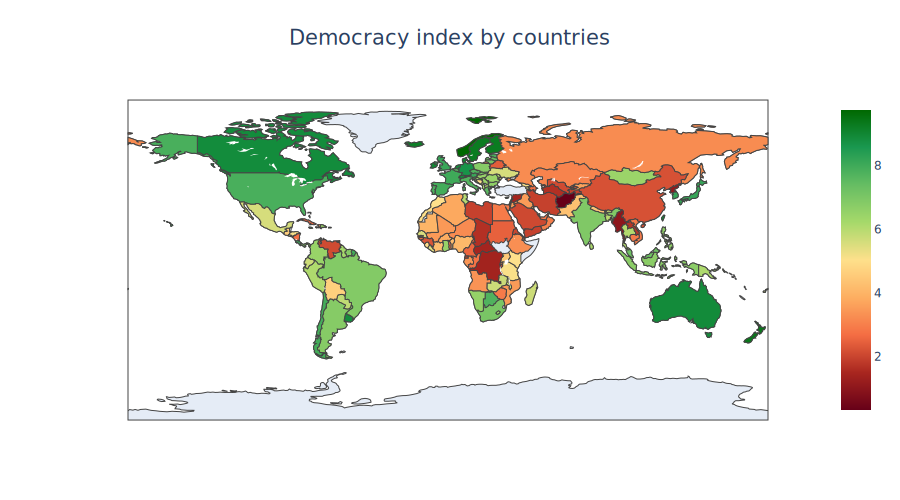

In [4]:
trace = go.Choropleth(z=democracy_rating['overall_score'],
                      locations=democracy_rating['country'],
                      locationmode='country names',
                      colorscale=colors_democracy_rating
                      )

layout = go.Layout(
    title={
        'text': "Democracy index by countries",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=21)}, width=900, height=500)
fig = go.Figure(data=trace, layout=layout)
fig.show('svg')

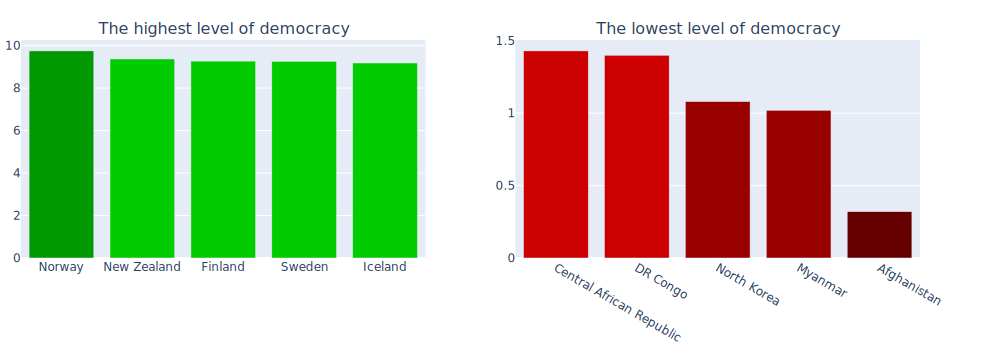

In [5]:
fig = subplots.make_subplots(rows=1, cols=2, 
                             subplot_titles=("The highest level of democracy", 
                                             "The lowest level of democracy"))

fig.add_trace(go.Bar(x=democracy_rating['country'].head(5), 
                     y=democracy_rating['overall_score'].head(5), 
                     marker_color=['#009900', '#00CC00', '#00CC00', '#00CC00', '#00CC00']), 
                     row=1, col=1)

fig.add_trace(go.Bar(x=democracy_rating['country'].tail(5), 
                     y=democracy_rating['overall_score'].tail(5), 
                     marker_color=['#CC0000', '#CC0000', '#990000', '#990000', '#660000']), 
                     row=1, col=2)

fig.update_layout(width=1000, height=350, 
                  margin=dict(t=40, b=20, l=5), 
                  showlegend=False)

#### Найдем континенты для стран

Чтобы проанализировать не только страны, но и континенты, добавим к странам континенты на которых они располагаются.

In [6]:
# список стран 
gc = geonamescache.GeonamesCache()
countries = gc.get_countries()

# подключаем конвертер стран
cc = coco.CountryConverter()

continents = {'AF': 'Africa', 'AS': 'Asia', 'NA': 'North America', 'SA': 'South America', 'OC': 'Oceania', 'EU': 'Europe'}

# переводим страны в формат ISO2 в таблице с индексом демократии и находим континент
countries_iso2 = cc.convert(names = democracy_rating['country'], to='ISO2')
democracy_rating['continent'] = [continents[countries[j]['continentcode']] for j in countries_iso2]

In [11]:
democracy_rating.head(2)

rank      country     regime_type  overall_score  electorat_and_pluralism  \
0     1       Norway  Full democracy           9.75                     10.0   
1     2  New Zealand  Full democracy           9.37                     10.0   

   government  poli­tical_partici­pation  poli­tical_cul­ture  \
0        9.64                      10.00                10.00   
1        8.93                       9.44                 8.75   

   civil_liber­ties continent  
0              9.12    Europe  
1              9.71   Oceania

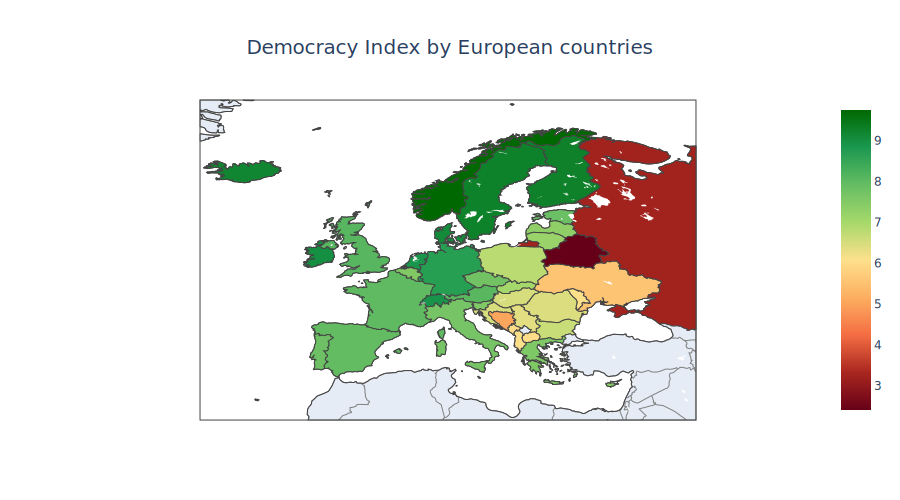

In [7]:
democracy_rating_europe = democracy_rating.query('continent == "Europe"')
# Создание объекта карты
fig = go.Figure()

# Добавление слоя с рейтингом стран Европы
fig.add_trace(go.Choropleth(
    z=democracy_rating_europe['overall_score'],
    locations=democracy_rating_europe['country'],
    locationmode='country names',
    colorscale=colors_democracy_rating
))

# Настройка параметров карты
fig.update_geos(
    resolution=50,
    showcountries=True,
    countrycolor='gray'
)

# Настройка области отображения
fig.update_layout(
    title={
        'text': "Democracy Index by European countries",
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)},
    geo=dict(
        lataxis_range=[30, 75],
        lonaxis_range=[-25, 45]
    ), width=900, height=500
)

#### Найдем средний уровень демократии по континентам и визуализируем

In [8]:
democracy_rating_by_continents = democracy_rating.groupby('continent', as_index=False) \
                                                 .agg({"overall_score":'mean'}) \
                                                 .sort_values(by='overall_score', ascending=False)
democracy_rating_by_continents

continent  overall_score
4        Oceania       7.408000
2         Europe       7.318500
5  South America       6.200833
3  North America       5.867857
1           Asia       4.175435
0         Africa       4.071600

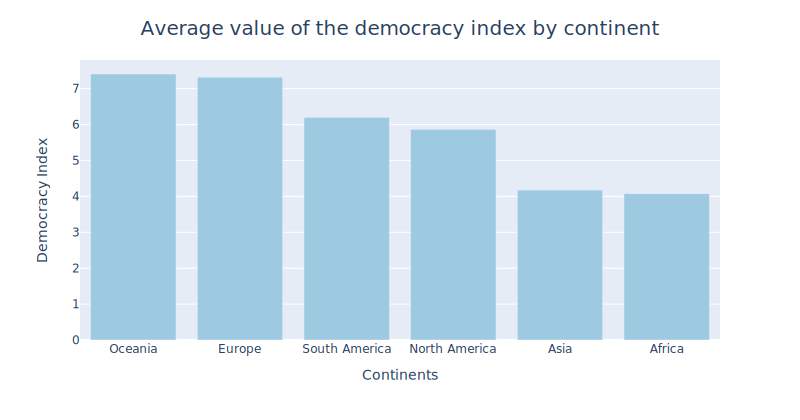

In [9]:
fig = px.bar(democracy_rating_by_continents, x='continent', y='overall_score', 
       width=800, height=420)

fig.update_traces(marker_color='rgb(158,202,225)')
fig.update_layout(title={
        'text': 'Average value of the democracy index by continent',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)}, margin=dict(t=60))

fig.update_xaxes(title_text='Continents')
fig.update_yaxes(title_text='Democracy Index')

### Индекс человеческого развития

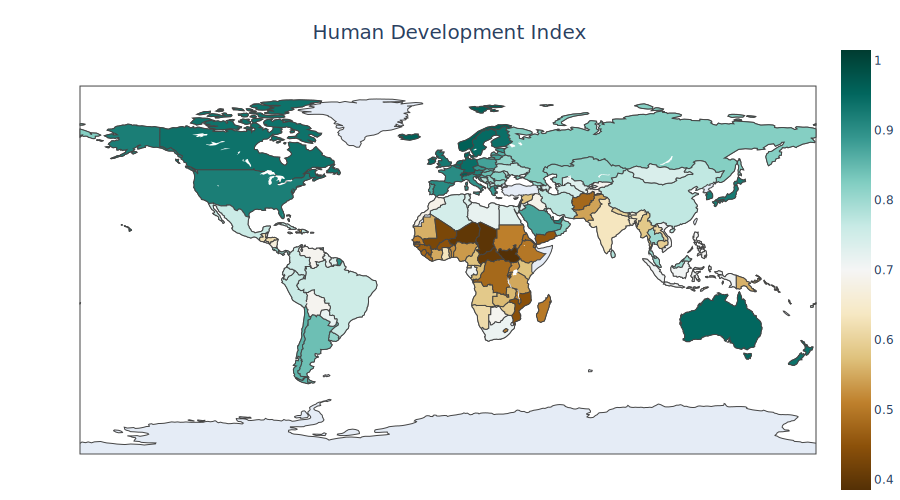

In [10]:
trace = go.Choropleth(z=human_dev_rating['hdi'], 
                      locations=human_dev_rating ['country'],
                      locationmode='country names',
                      colorscale=px.colors.diverging.BrBG,
                      zmid=0.7)
layout = go.Layout(title={'text':'Human Development Index', 
                          'x':0.5, 'y':0.95,
                          'font': dict(size=20)}, margin=dict(b=0, t=40), width=900, height=500)
fig = go.Figure(data=trace, layout=layout)
fig

#### Найдем средний ИЧР по каждому континенту
1. Найдем для каждой страны ее континент, чтобы узнать средний ИЧР по каждому континенту.
2. Найдем наибольший ИЧР по странам в Южной Америке, Северной Америке и Азии 

In [11]:
# переводим страны в формат ISO2 в таблице с человеческим развитием и находим континент
countries_iso2 = cc.convert(names = human_dev_rating['country'], to='ISO2')
human_dev_rating['continent'] = [continents[countries[i]['continentcode']] for i in countries_iso2]

In [12]:
# средний ИЧР по континентам
hdi_mean_by_continents = human_dev_rating.groupby('continent', as_index=False) \
                                         .agg({'hdi': 'mean'}) \
                                         .sort_values(by='hdi', ascending=False)
# наивысший ИЧР в Южной Америке
hdi_by_s_america = human_dev_rating.query('continent == "South America"') \
                                   .sort_values(by='hdi', ascending=False).head(5)

# наивысший ИЧР в Северной Америке
hdi_by_n_america = human_dev_rating.query('continent == "North America"') \
                                   .sort_values(by='hdi', ascending=False).head(5)

# наивысший ИЧР в Азии
hdi_by_asia = human_dev_rating.query('continent == "Asia"') \
                              .sort_values(by='hdi', ascending=False).head(5)


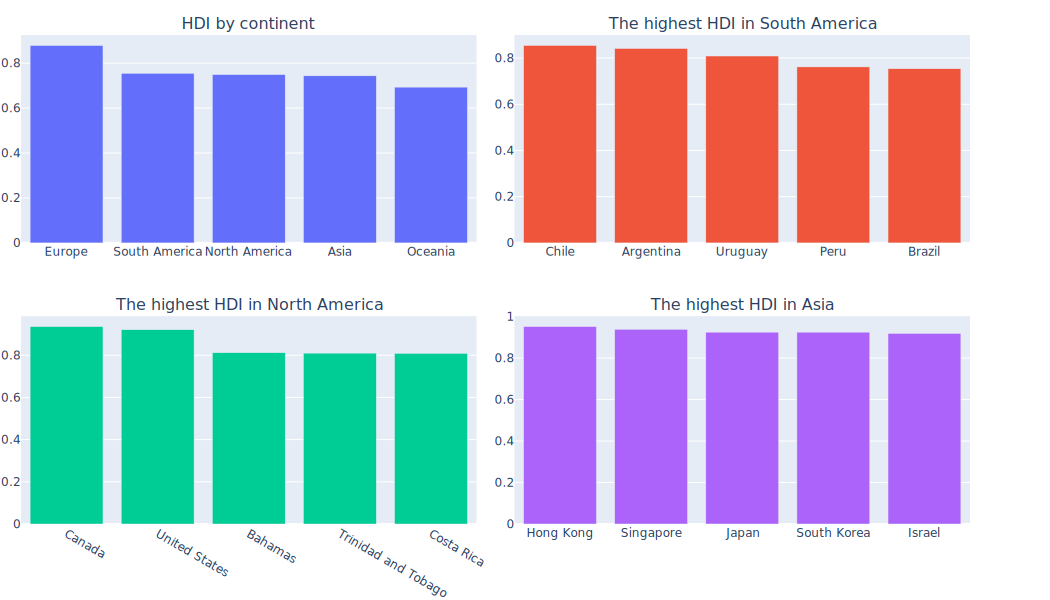

In [13]:
fig = subplots.make_subplots(rows=2, cols=2, 
                             subplot_titles=('HDI by continent',
                                             "The highest HDI in South America", 
                                             "The highest HDI in North America", 
                                             'The highest HDI in Asia'),
                             specs = [[{}, {}], [{}, {}]], horizontal_spacing = 0.04, vertical_spacing=0.15)

fig.add_trace(go.Bar(x=hdi_mean_by_continents['continent'], y=hdi_mean_by_continents['hdi'].head(5)), row=1, col=1)
fig.add_trace(go.Bar(x=hdi_by_s_america['country'], y=hdi_by_s_america['hdi'].head(5)), row=1, col=2)
fig.add_trace(go.Bar(x=hdi_by_n_america['country'], y=hdi_by_n_america['hdi'].head(5)), row=2, col=1)
fig.add_trace(go.Bar(x=hdi_by_asia['country'], y=hdi_by_asia['hdi'].head(5)), row=2, col=2)


fig.update_layout(width=1050, height=600, margin={'t':35, 'b':40, 'l':0}, showlegend=False)

fig.show()

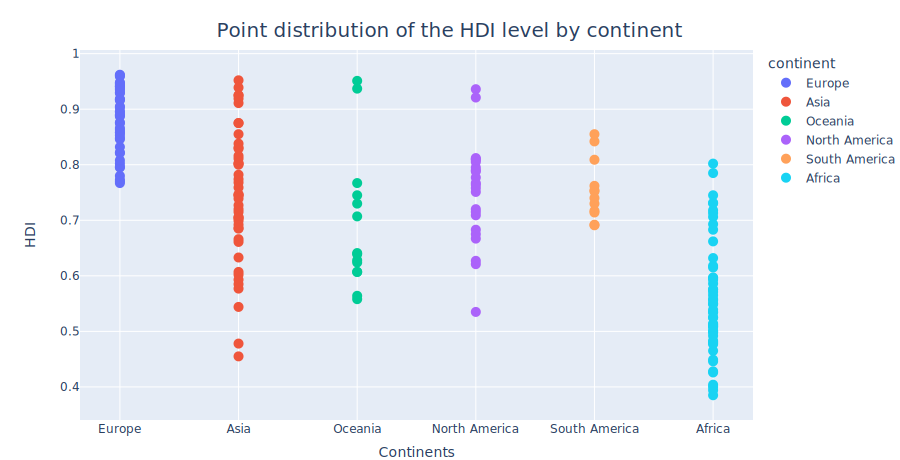

In [14]:
fig = px.scatter(data_frame=human_dev_rating, 
                 x='continent', 
                 y='hdi', 
                 color='continent', hover_data=['country']).update_layout(width=900, height=460, margin={'t':50, 'b':0})

fig.update_traces(marker=dict(size=10))
fig.update_layout(
    title={
        'text': 'Point distribution of the HDI level by continent',
        'y':0.95,
        'x':0.5,
        'font': dict(size=20)
    }
)
fig.update_xaxes(title_text='Continents')
fig.update_yaxes(title_text='HDI')
fig

#### Визуализируем прирост ИЧР

In [15]:
# убираем проценты в колонке со средним годовым ростом ИЧР
def with_out_percent(x): 
    return x[:-1]
human_dev_rating['average_annual_growth'] = human_dev_rating['average_annual_growth'].apply(with_out_percent)

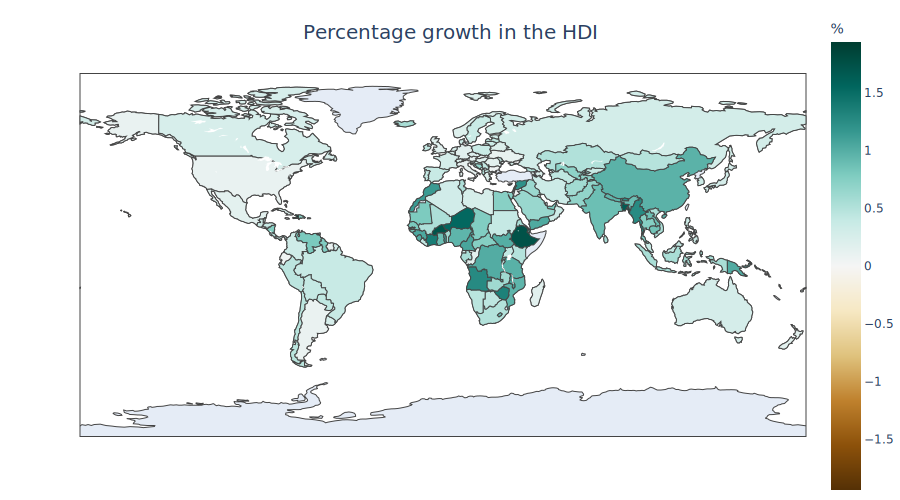

In [16]:
trace = go.Choropleth(z=human_dev_rating['average_annual_growth'], 
                      locations=human_dev_rating ['country'],
                      locationmode='country names',
                      colorscale=px.colors.diverging.BrBG,
                      zmid=0,
                      colorbar=dict(title="%"))
layout = go.Layout(title={
        'text': 'Percentage growth in the HDI',
        'y':0.95,
        'x':0.5,
        'font': dict(size=20)
    }, margin={'t':10, 'b':0}, width=900, height=500)

fig = go.Figure(data=trace, layout=layout)
fig

### Рейтинг городов по качеству жизни

In [157]:
quality_of_life_rating.head(2)

rank    city city_eng      country  city_lat_geo  city_lon_geo
0     1  Vienna   Vienna      Austria     48.208354     16.372504
1     2  Zürich   Zurich  Switzerland     47.374449      8.541042

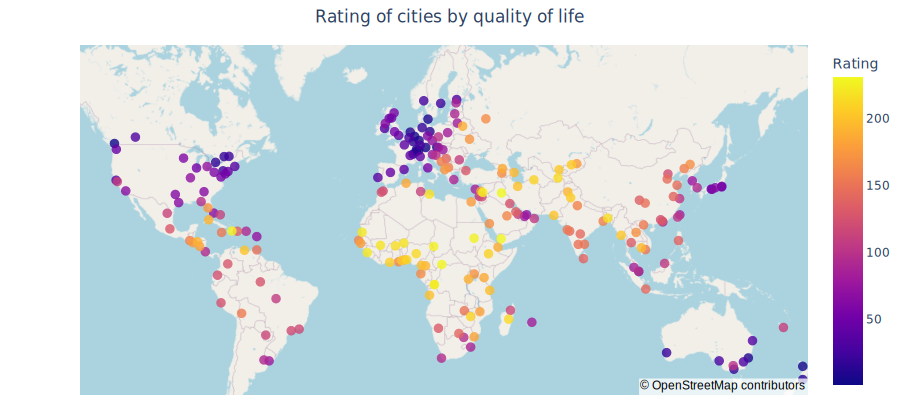

In [17]:
px.set_mapbox_access_token("Your mapbox API Token")
fig = px.scatter_mapbox(quality_of_life_rating, lat=quality_of_life_rating['city_lat_geo'], 
                        lon=quality_of_life_rating['city_lon_geo'], 
                        color="rank",
                        hover_name='rank', 
                        mapbox_style="open-street-map", zoom=0.7, 
                        title='Rating of cities by quality of life')
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(margin={'b':5, 't':45}, title_x=0.5,width=900, height=400, coloraxis_colorbar=dict(title="Rating"))
fig.show()

### Рейтинг городов по безопасности

In [159]:
security_cities_rating.head(3)

0 overall_rating overall_rating_country  overall_score digital_sec  score1  \
0  1     Copenhagen                Denmark           82.4      Sydney    83.2   
1  2        Toronto                 Canada           82.2   Singapore    82.8   
2  3      Singapore              Singapore           80.7  Copenhagen    82.2   

  health_sec  score2 infrastucture_sec  score3 personal_sec  score4  \
0      Tokyo    87.7         Hong Kong    93.4   Copenhagen    86.4   
1  Singapore    84.1         Singapore    92.1    Amsterdam    80.5   
2  Hong Kong    84.0        Copenhagen    89.0    Frankfurt    80.3   

  environmental_sec  score5  
0        Wellington    91.7  
1           Toronto    90.3  
2     Washington DC    87.6

In [18]:
# с помощью библиотеки geopy найдем lat и lon городов
overall_rating_lat = []
overall_rating_lon = []

geolocator = Nominatim(user_agent="my_project_name", timeout=3)
for city in tqdm(list(security_cities_rating['overall_rating'])):
    overall_rating_lat.append(float(geolocator.geocode(city).raw['lat']))
    overall_rating_lon.append(float(geolocator.geocode(city).raw['lon']))

  0%|          | 0/60 [00:00<?, ?it/s]

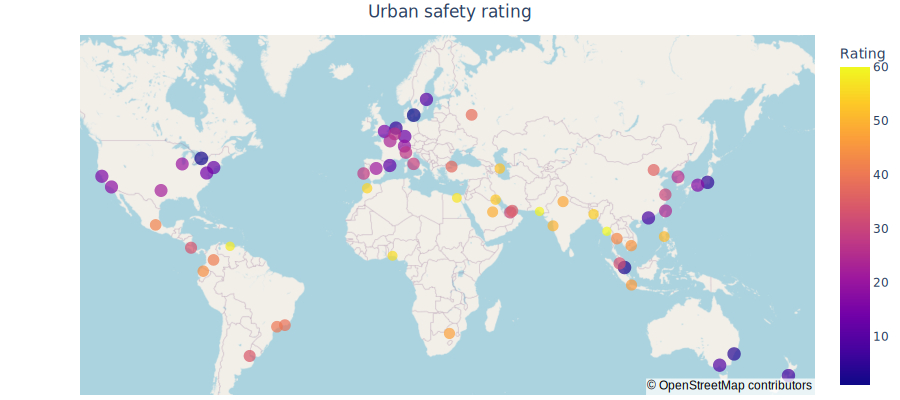

In [22]:
px.set_mapbox_access_token("Your mapbox API Token")
fig = px.scatter_mapbox(security_cities_rating, lat=overall_rating_lat, lon=overall_rating_lon, 
                        color="0",
                        hover_name='overall_rating', 
                        mapbox_style="open-street-map", zoom=0.7, 
                        title="Urban safety rating", 
                        size='overall_score', size_max=10)

fig.update_layout(margin={'b':5, 't':35}, title_x=0.5,width=900, height=400, coloraxis_colorbar=dict(title="Rating"))
fig.show()

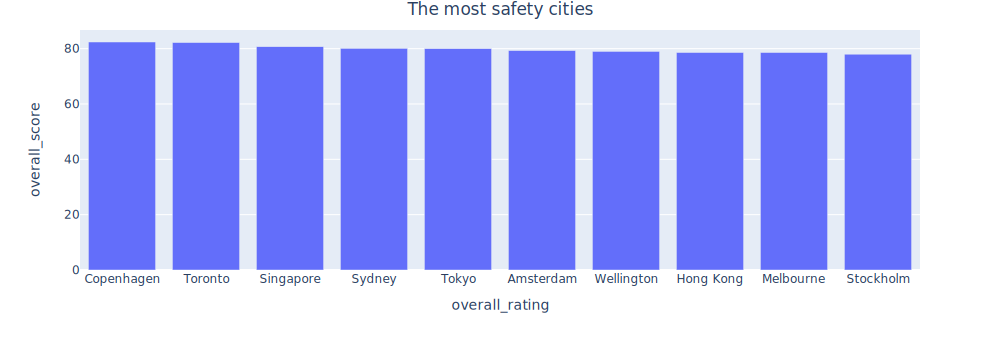

In [43]:
fig = px.bar(data_frame=security_cities_rating.head(10), x='overall_rating', y='overall_score')
fig.update_layout(width=1000,height=350, title='The most safety cities', title_x=0.5, margin={'t':30})
fig

## Распределение ИЧР

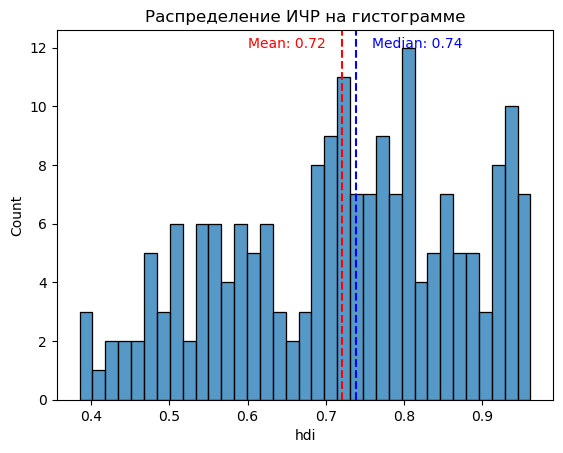

In [44]:
# построим распределение уровня ИЧР
fig, ax = plt.subplots()
sns.histplot(human_dev_rating['hdi'], bins=35, ax=ax).set(title='Распределение ИЧР на гистограмме')

# добавим вертикальные линии для среднего и медианного значений
mean = human_dev_rating["hdi"].mean()
median = human_dev_rating["hdi"].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='b', linestyle='--')

# добавим метки для среднего и медианного значений
plt.text(mean - 0.12, 12, f"Mean: {mean:.2f}", color='r')
plt.text(median + 0.02, 12, f"Median: {median:.2f}", color='b')

plt.show()


## Корреляция между демократией и ИЧР

In [20]:
# соединим две таблицы с рейтингами по ИЧР и демократии
human_dev_and_democracy = human_dev_rating.merge(democracy_rating, 
                                                 left_on='country', right_on='country', how='inner')
human_dev_and_democracy = human_dev_and_democracy.rename(columns={'continent_x':'continent'})
human_dev_and_democracy.head(2)

rank_x      country    hdi average_annual_growth continent  rank_y  \
0       1  Switzerland  0.962                  0.19    Europe       9   
1       2       Norway  0.961                  0.19    Europe       1   

      regime_type  overall_score  electorat_and_pluralism  government  \
0  Full democracy           8.90                     9.58        8.93   
1  Full democracy           9.75                    10.00        9.64   

   poli­tical_partici­pation  poli­tical_cul­ture  civil_liber­ties  \
0                       7.78                 9.38              8.82   
1                      10.00                10.00              9.12   

  continent_y  
0      Europe  
1      Europe

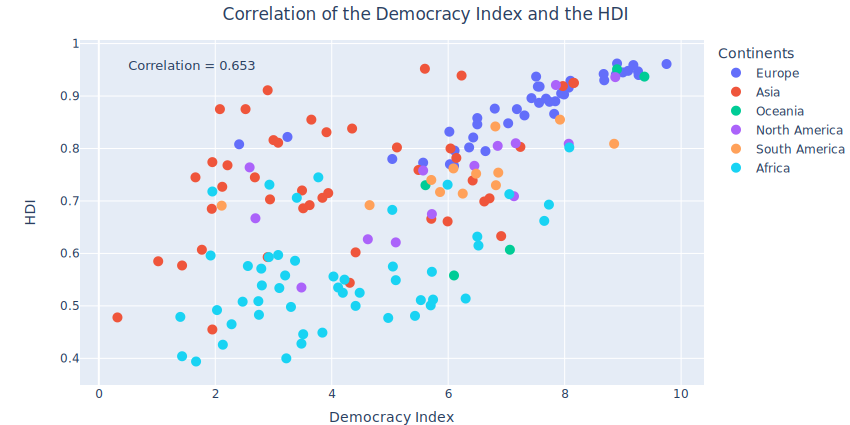

In [21]:
# найдем корреляцию между демократией и ИЧР
cor_cof = np.corrcoef(x=human_dev_and_democracy['overall_score'], y=human_dev_and_democracy['hdi'])[0, 1]

# построим точечный график
fig = px.scatter(data_frame=human_dev_and_democracy, x='overall_score', y='hdi', color='continent', hover_name='country', 
                 title='Correlation of the Democracy Index and the HDI')

fig.update_layout(width=850, height=425, margin={'t':40, 'b':0}, title_x=0.5,
                  xaxis_title="Democracy Index",
                  yaxis_title="HDI",
                  legend_title='Continents')

fig.update_traces(marker_size=10)
fig.add_annotation(x=1.6, y=0.96, showarrow=False,
            text=f'Correlation = {round(cor_cof, 3)}',
            font=dict(size=13))
fig

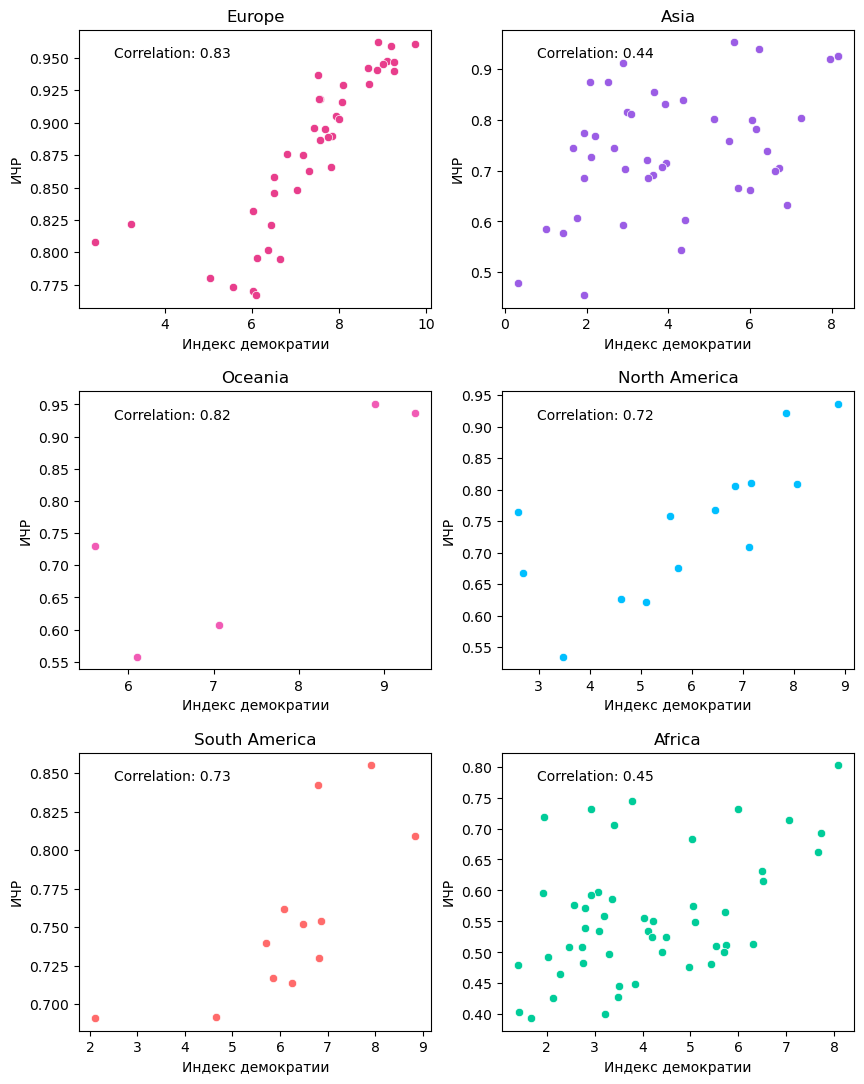

In [48]:
fig, ax = plt.subplots(3,2, figsize=(10, 13))
fig.subplots_adjust(hspace=0.3)
continents = human_dev_and_democracy['continent'].unique()
colors = ['#e83e8c', '#9b5de5', '#f15bb5', '#00bfff', '#ff6b6b', '#00cc99']
counter = 0

for i in range(3):
    for j in range(2):
        continent = continents[counter]
        
        # находим коэффициент корреляции
        corr = np.corrcoef(x=human_dev_and_democracy[human_dev_and_democracy['continent'] == continent]['overall_score'], 
                           y=human_dev_and_democracy[human_dev_and_democracy['continent'] == continent]['hdi'])[0, 1]
        
        # строим график
        sns.scatterplot(data=human_dev_and_democracy[human_dev_and_democracy['continent'] == continent], 
                x='overall_score', y='hdi', ax=ax[i,j], color=colors[counter])
        
        # устанавливаем заголовок и коэффициент корреляции
        ax[i,j].set_title(continent)
        ax[i,j].text(0.1, 0.9, f'Correlation: {corr:.2f}', transform=ax[i,j].transAxes)
        ax[i,j].set_xlabel('Индекс демократии')
        ax[i,j].set_ylabel('ИЧР')
        counter += 1


## Гипотеза

Проверим гипотезу о том, что в среднем ИЧР в Европе выше чем в Азии

In [50]:
hdi_europe = human_dev_rating.query('continent == "Europe"')['hdi']
hdi_asia = human_dev_rating.query('continent == "Asia"')['hdi']

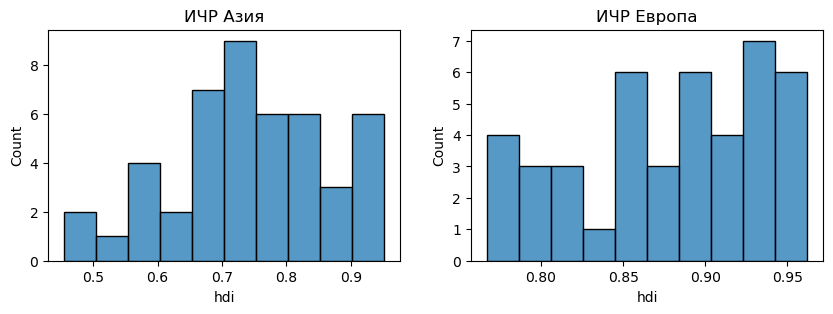

In [51]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(hdi_asia, ax=ax[0], bins=10)
ax[0].set_title('ИЧР Азия')
sns.histplot(hdi_europe, ax=ax[1], bins=10)
ax[1].set_title('ИЧР Европа');

In [169]:
print(f'Средний ИЧР в Азии {hdi_asia.mean()}')
print(f'Средний ИЧР в Европе {hdi_europe.mean()}')

Средний ИЧР в Азии 0.7435652173913042
Средний ИЧР в Европе 0.8791162790697677


In [170]:
t_stat, p_value = ttest_ind(hdi_europe, hdi_asia, equal_var=False)

print(f't-статистика: {t_stat}')
print(f'p-значение: {p_value}')


t-статистика: 6.815109879881194
p-значение: 3.3443462452315383e-09


## Результаты
1. Рейтинги стран и городов визуализированы в удобный формат на карте мира
2. После группировки стран получена информация по континентам
3. Получена корреляция между Индексом демократии и ИЧР
4. Проведен T-тест для ИЧР среди стран Азии и Европы

## Выводы
1. Между ИЧР и Индексом демократии есть корреляция. Особенно она заметна в Европе. Нельзя однозначно сказать, что индекс демократии наиболее высокий в странах с высоким ИЧР, так как есть множество других факторов + культурные и исторические особенности различных стран.
2. Т-тест показал p-value ниже 0.05, что дает возможность сделать вывод о том, что ИЧР в странах Европы в среднем выше чем в страна Азии.